https://www.kaggle.com/datasets/laavanya/stress-level-detection?resource=download&select=Stress-Lysis.csv

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import google.colab
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import scipy.stats as stats
from sklearn.feature_selection import f_classif

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
step_df = pd.read_csv("/content/drive/MyDrive/project/StressFromSteps.csv")

In [4]:
step_df.head(2000)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1995,24.10,93.10,178,2
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2


In [5]:
df = step_df.copy()

In [6]:
min_values = df.min()
max_values = df.max()

# Combine results into a single DataFrame
min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})

print(min_max_df)

               Min    Max
Humidity      10.0   30.0
Temperature   79.0   99.0
Step count     0.0  200.0
Stress Level   0.0    2.0


In [7]:
df.groupby('Stress Level').size()

,0
Stress Level,
0,501
1,790
2,710


In [8]:
print(len(df))

2001


In [9]:
import pandas as pd

# Assuming sleep_df is already loaded as in your previous code
# ... (your existing code to load the dataframe) ...

def find_bad_rows(df):
    """Finds rows with 'other' values or non-numeric values where numbers are expected."""
    bad_rows_indices = []

    # Iterate through each column
    for col in df.columns:
      # Handle cases where columns might be numeric
        if pd.api.types.is_numeric_dtype(df[col]):
          # Attempt to convert to numeric, catching errors for non-numeric values
            try:
                pd.to_numeric(df[col])
            except (ValueError, TypeError):
                bad_rows_indices.extend(df[pd.to_numeric(df[col], errors='coerce').isnull()].index)

        elif 'other' in df[col].astype(str).str.lower().values:
            bad_rows_indices.extend(df[df[col].astype(str).str.lower().str.contains('other')].index)

    # Return only unique bad row indices
    return df.iloc[list(set(bad_rows_indices))]

bad_rows = find_bad_rows(step_df)
bad_rows

,Humidity,Temperature,Step count,Stress Level


In [10]:
print(df.columns)

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')


In [11]:
# Keep only interesting columns
df = df[['Step count', 'Stress Level']]

print(df.head())

   Step count  Stress Level
0         123             1
1          93             1
2         196             2
3         177             2
4          87             0


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, InputLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Drop any rows with missing values in key columns
df = df.dropna(subset=['Step count', 'Stress Level'])


# Features and labels
X = df[['Step count']].values
y = df['Stress Level'].values

# Normalize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False, categories=[np.arange(3)])
y_encoded = encoder.fit_transform(y.reshape(-1, 1))


    # Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [13]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])


# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model
loss, metric = model.evaluate(X_test, y_test)
print(f"Test accuracy: {metric}")

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5221 - loss: 0.9810 - val_accuracy: 0.6469 - val_loss: 0.7365
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6659 - loss: 0.6937 - val_accuracy: 0.7094 - val_loss: 0.5793
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6953 - loss: 0.5603 - val_accuracy: 0.7344 - val_loss: 0.4938
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7746 - loss: 0.4564 - val_accuracy: 0.7844 - val_loss: 0.4407
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7862 - loss: 0.4218 - val_accuracy: 0.7937 - val_loss: 0.4086
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7747 - loss: 0.4098 - val_accuracy: 0.7937 - val_loss: 0.3932
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7720 - loss: 0.3845 - val_accuracy: 0.8031 - val_loss: 0.3815
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7890 - loss: 0.3650 - val_accuracy: 0.7937 - val_los

In [15]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming a multi-class classification problem
y_test_classes = np.argmax(y_test, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Precision: 0.8802469010866
Recall: 0.7955112219451371
Accuracy: 0.7955112219451371
F1 Score: 0.7898752452329468
Matthews Correlation Coefficient: 0.7425389497627262
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.99      0.70        95
           1       0.99      0.49      0.66       160
           2       0.98      1.00      0.99       146

    accuracy                           0.80       401
   macro avg       0.84      0.83      0.78       401
weighted avg       0.88      0.80      0.79       401



Text(50.722222222222214, 0.5, 'True Labels')

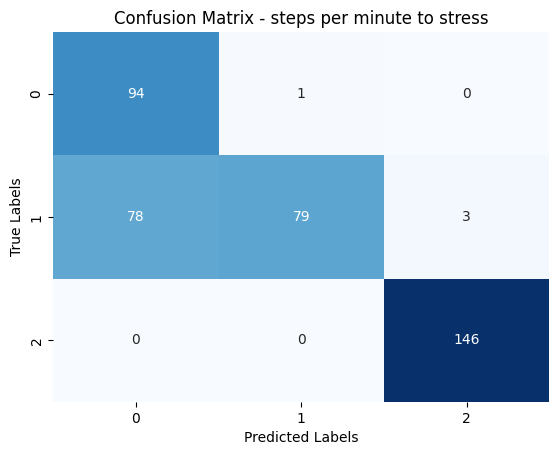

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels in y_test
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print("Classification Report:\n", report)
plt.title('Confusion Matrix - steps per minute to stress')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#disp = ConfusionMatrixDisplay(cm, display_labels=['Stress 0', 'Stress 1','Stress 2'])
#disp.plot()

In [ ]:
probs = model.predict(X_test)
print(probs)
predicted_class = np.argmax(probs, axis=1)
print(predicted_class)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[5.0096607e-01 4.9902073e-01 1.3274443e-05]
 [8.1010530e-06 9.9918586e-01 8.0607063e-04]
 [5.0096607e-01 4.9902073e-01 1.3274443e-05]
 ...
 [3.0313522e-04 9.9898118e-01 7.1583461e-04]
 [4.5980936e-01 5.3998011e-01 2.1049396e-04]
 [3.0925783e-23 2.8396742e-12 1.0000000e+00]]
[0 1 0 1 1 2 0 1 2 1 0 0 2 0 2 1 0 2 0 1 2 1 1 0 0 0 0 1 2 2 1 0 2 0 2 0 2
 1 0 0 1 1 1 1 2 2 1 0 2 0 0 2 1 1 1 2 0 0 0 2 2 0 2 0 1 0 1 0 1 0 2 2 0 0
 2 0 0 2 2 0 2 2 2 2 0 2 0 2 2 2 1 1 0 1 1 0 2 2 1 1 1 2 2 1 2 2 0 0 2 1 0
 0 2 2 0 1 2 2 0 0 2 1 1 1 0 1 2 1 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 1 2 0
 0 1 2 1 2 0 1 2 1 0 2 0 1 0 0 1 2 1 2 2 0 1 0 0 2 1 0 2 1 2 1 1 0 0 1 2 1
 0 0 0 1 0 0 2 2 1 1 2 1 2 2 0 1 2 2 1 1 1 0 0 0 2 0 1 2 0 1 0 1 0 1 1 0 0
 2 0 0 0 0 1 2 0 0 2 0 2 2 2 2 1 1 1 2 0 1 0 1 1 2 2 2 2 1 2 1 0 1 0 2 0 1
 1 1 0 2 2 2 1 0 2 0 2 1 1 1 0 2 1 2 2 1 1 0 2 0 0 2 2 0 1 2 1 1 1 2 0 1 2
 2 2 0 1 2 2 0 2 0 2 1 1 1 1 1 1 0 0 1 0 1 2 0 2 1 2 0 0 0 1 1 2 2 0 0 1 2
 2 0 0 2 

In [ ]:
model.save("stress_from_steps_model.keras")
model.save("stress_from_steps_model.h5")

import joblib

# Save
joblib.dump(scaler, 'steps_scaler.pkl')

['steps_scaler.pkl']

In [ ]:
from google.colab import files
files.download("stress_from_steps_model.keras")
files.download('steps_scaler.pkl')
files.download("stress_from_steps_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>